# 二値分類の例：映画レビューの分類

二値分類では、IMDbデータセットを使用する。
このデータセットはinternet movie databaseから収集された「肯定的」「否定的」な50,000件のレビューで構成されている。

In [23]:
# 読み込み
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [24]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [25]:
train_labels[0]

1

整数のインデックスになっているデータをテキストデータに変換して確認。

In [43]:
# マッピング用辞書
word_index = imdb.get_word_index()
# 単語をマッピング
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [44]:
# デコード
# インデックス
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## データの準備

In [72]:
# 整数のシーケンスを二値行列に変換
import numpy as np

# 形状を(samples, word_indices)に変換
def vectorise_sequences(sequences, dimension=10000):
    
    # 形状が(len(sequences), dimension)の行列（０埋め）
    results = np.zeros((len(sequences), dimension))
    
    # 出現した単語に1を割り当て
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 #results[i]のインデックスに1を設定 sequenceの値に一致すつ列に1を立てる 
    
    return results

In [75]:
x_train =vectorise_sequences(train_data)
x_test =vectorise_sequences(test_data)

In [76]:
x_train.shape

(25000, 10000)

In [77]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [80]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## ニューラルネットワークの構築

In [90]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [91]:
# モデルのコンパイル
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [92]:
# オプティマイザの詳細な設定方法

In [93]:
# カスタム損失関数とカスタム指標の使用

## アプローチの検証

In [95]:
# 検証データセットの設定
x_val = x_train[:10000]
partal_x_train  =x_train[10000:]

y_val = y_train[:10000]
partal_y_train  =y_train[10000:]

In [97]:
# モデルの訓練
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partal_x_train,
                   partal_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.5392 - acc: 0.7749 - val_loss: 0.4001 - val_acc: 0.8691
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3207 - acc: 0.8989 - val_loss: 0.3288 - val_acc: 0.8716
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2356 - acc: 0.9249 - val_loss: 0.2871 - val_acc: 0.8864
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1850 - acc: 0.9392 - val_loss: 0.2744 - val_acc: 0.8909
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1529 - acc: 0.9513 - val_loss: 0.3003 - val_acc: 0.8810
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1232 - acc: 0.9631 - val_loss: 0.2876 - val_acc: 0.8881
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1069 - acc: 0.9670 - val_loss: 0.3031 - 

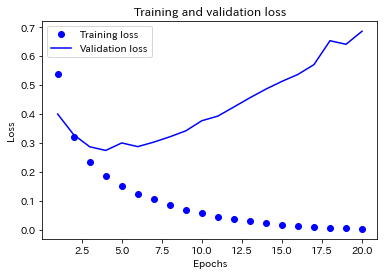

In [108]:
# 訓練データと検証データでの損失率をプロット
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

validation lossがおよそ5epochで最小になってから上がり続けており、過学習の状態。

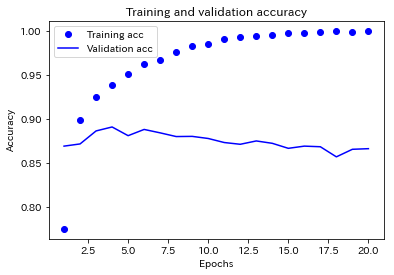

In [109]:
# 訓練データと検証データでの正解率をプロット
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

こちらもtrainとテストで差があり過学習。

In [115]:
# 4エポックで再訓練
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.3133 - acc: 0.9433
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1584 - acc: 0.9583
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1147 - acc: 0.9674
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


In [116]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 82us/step


[0.50900265219211582, 0.85651999999999995]

In [118]:
# 予測
model.predict(x_test)

array([[ 0.03002283],
       [ 1.        ],
       [ 0.96779746],
       ..., 
       [ 0.11955325],
       [ 0.0765814 ],
       [ 0.88931286]], dtype=float32)